# Análisis Experimental de Desempeño: Proyecto Alpha

## Introducción

Este notebook documenta el análisis experimental del desempeño del juego "¡Pégale al monstruo!" desarrollado como parte del Proyecto Alpha. El objetivo principal es evaluar la escalabilidad y la eficiencia del sistema bajo diferentes cargas de trabajo, analizando el tiempo de respuesta y la tasa de éxito de conexión.

## Datos

Los datos fueron recolectados durante sesiones de juego simuladas, variando el número de jugadores de 50 a 500. Cada sesión generó registros detallados del tiempo de respuesta y del éxito en el proceso de registro, almacenados en archivos CSV para su posterior análisis.


In [177]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
fileJuegoPath="./Analysis/juego/"
fileRegistroPath="Analysis/registro/"
initial_clients = 50
final_clients = 500

### Análisis de Tiempo de Juego

Para facilitar el manejo de la información, se crea un diccionario 'values_juego' que almacena todos los valores de la totalidad de los experimentos para cada número de clientes.

In [174]:
values_juego  = {}

for numero_clientes in range(50, 501, 50):
  values_juego[numero_clientes] = [] # List to store averages

for number_clients in range(initial_clients, final_clients + 1, 50):
  for current_iter in range(10):
    fileName = str(number_clients) + "_clientes_" + str(current_iter) + ".csv"
    try:
      with open(fileJuegoPath + fileName, 'r') as file:
        reader = csv.reader(file)
        # Assuming the first column contains the data for calculating the average
        for row in reader:
          values_juego[number_clients].append(float(row[0]))  # Append values from the first column
    except FileNotFoundError:
      print(f"File not found: {fileName}")
      pass

# Calculate the average of values
for numero_clientes in values_juego:
   print(values_juego[numero_clientes])


[0.003865359, 0.000208279, 0.000231376, 0.000236937, 0.000207698, 0.000212919, 3.8658e-05, 0.000114791, 0.00338342, 0.000174671, 5.2545e-05, 6.5532e-05, 0.000555628, 0.000135633, 8.459e-05, 0.000202277, 2.468e-05, 0.003874067, 0.003672281, 0.000169892, 0.00019907, 0.000113639, 2.3777e-05, 5.9069e-05, 0.00283203, 0.00016417, 0.000134441, 0.003397859, 0.000227057, 0.000178179, 8.6424e-05, 0.00016918, 0.002815356, 0.000205123, 0.000113359, 0.002823623, 1.1232e-05, 0.003893186, 0.000205594, 2.1864e-05, 0.000342459, 0.000227508, 0.003415113, 2.0651e-05, 0.00478992, 0.003900621, 0.003362117, 3.1042e-05, 0.00394004, 0.000211255, 2.0811e-05, 0.000105005, 0.000142248, 3.9687e-05, 0.0002046, 7.7111e-05, 1.9208e-05, 0.00023554, 0.000134443, 0.000254267, 0.000103863, 0.000215451, 1.6242e-05, 2.8255e-05, 0.00021498, 0.000147558, 6.7682e-05, 0.000118211, 7.0878e-05, 8.4425e-05, 0.000378229, 0.000235851, 0.000295768, 5.4466e-05, 2.033e-05, 3.2814e-05, 0.000270659, 0.000246742, 4.3675e-05, 0.022664132

### Promedio

In [157]:
# Lista para almacenar los resultados
resultados_promedio_juego = []

# Recorrer el diccionario values_juego
for numero_clientes, tiempos in values_juego.items():
    # Calcular el máximo y el mínimo del tiempo de juego
    maximo_tiempo = max(tiempos)
    minimo_tiempo = min(tiempos)
    
    # Calcular el promedio del tiempo de juego
    promedio_tiempo = sum(tiempos) / len(tiempos)
    
    # Agregar el resultado a la lista
    resultados_promedio_juego.append((numero_clientes, maximo_tiempo, minimo_tiempo, promedio_tiempo))

# Crear un DataFrame a partir de la lista
resultados_promedio_juego = pd.DataFrame(resultados_promedio_juego, columns=["Número de clientes", "Máximo tiempo", "Mínimo tiempo", "Promedio tiempo"])

# Mostrar el DataFrame
print(resultados_promedio_juego.to_string())


   Número de clientes  Máximo tiempo  Mínimo tiempo  Promedio tiempo
0                  50       0.022845       0.000011         0.000682
1                 100       0.002387       0.000002         0.000510
2                 150       0.010496       0.000004         0.000785
3                 200       0.024656       0.000006         0.002034
4                 250       0.016828       0.000002         0.000726
5                 300       0.015730       0.000002         0.001130
6                 350       0.017261       0.000002         0.001159
7                 400       0.005789       0.000002         0.001129
8                 450       0.004156       0.000001         0.001193
9                 500       0.020446       0.000004         0.001933


In [160]:
# Calcular el promedio por columna
promedios_por_columna = resultados_promedio_juego.mean(axis=0)

# Mostrar los promedios por columna
print(promedios_por_columna)

Número de clientes    275.000000
Máximo tiempo           0.014060
Mínimo tiempo           0.000004
Promedio tiempo         0.001128
dtype: float64


### Desviación estándar

In [114]:
# Lista para almacenar los resultados
resultados_desviacion_juego = []

# Recorrer el diccionario
for numero_clientes, tiempos in values_juego.items():
    # Calcular la desviación estándar del tiempo de juego
    desviacion_estandar = np.std(tiempos)
    
    # Agregar el resultado a la lista
    resultados_desviacion_juego.append((numero_clientes, desviacion_estandar))

# Crear un DataFrame a partir de la lista
resultados_desviacion_juego = pd.DataFrame(resultados_desviacion_juego, columns=["Número de clientes", "Desviación estándar"])

# Mostrar el DataFrame
print(resultados_desviacion_juego.to_string())

   Número de clientes  Desviación estándar
0                  50             0.002863
1                 100             0.000485
2                 150             0.001573
3                 200             0.004667
4                 250             0.001340
5                 300             0.001908
6                 350             0.002103
7                 400             0.000692
8                 450             0.000716
9                 500             0.002565


#### Función para calcular las posiciones de las líneas equidistantes:

In [115]:
def calcular_posiciones_lineas(minimo, maximo, numero_lineas):
    """
    Calcula las posiciones equidistantes entre un mínimo y un máximo.

    Parámetros:
        minimo: El valor mínimo del rango.
        maximo: El valor máximo del rango.
        numero_lineas: El número de líneas a generar.

    Retorno:
        Una lista con las posiciones de las líneas.
    """
    posiciones = []
    for i in range(numero_lineas + 1):
        posicion = minimo + (i * (maximo - minimo)) / numero_lineas
        posiciones.append(posicion)
    return posiciones

### Graficar promedio:

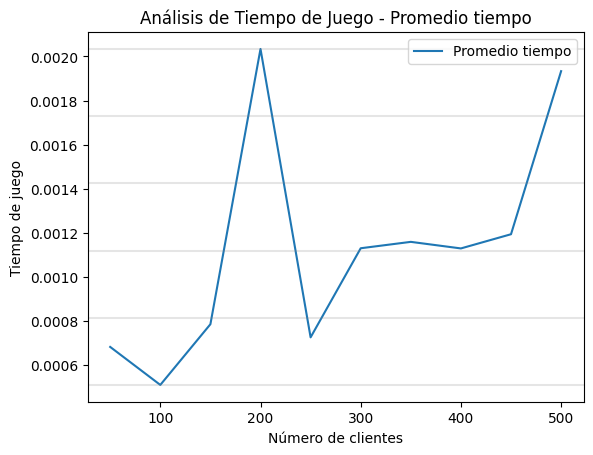

In [161]:
# Seleccionar la columna "Número de clientes" y "Promedio tiempo" del DataFrame
numero_clientes = resultados_promedio_juego["Número de clientes"]
promedio_juego = resultados_promedio_juego["Promedio tiempo"]

# Calcular las posiciones de las líneas equidistantes
posiciones_lineas = calcular_posiciones_lineas(min(promedio_juego), max(promedio_juego), 5)

# Graficar el promedio
plt.plot(numero_clientes, promedio_juego, label="Promedio tiempo")
plt.xlabel("Número de clientes")
plt.ylabel("Tiempo de juego")
plt.title("Análisis de Tiempo de Juego - Promedio tiempo")

# Agregar líneas horizontales equidistantes
for posicion in posiciones_lineas:
    plt.axhline(posicion, color="gray", alpha=0.2)

plt.legend()
plt.show()

### Graficar desviación estándar:

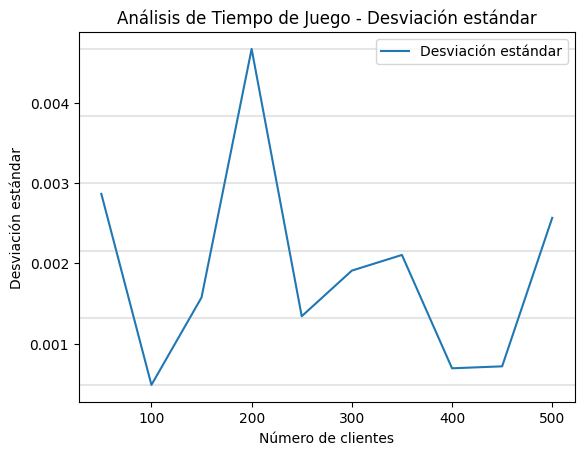

In [139]:
# Seleccionar la columna "Número de clientes" y "Desviación estándar" del DataFrame
numero_clientes = resultados_desviacion_juego["Número de clientes"]
desviacion_juego = resultados_desviacion_juego["Desviación estándar"]

# Calcular las posiciones de las líneas equidistantes
posiciones_lineas = calcular_posiciones_lineas(min(desviacion_juego), max(desviacion_juego), 5)

# Graficar la desviación estándar
plt.plot(numero_clientes, desviacion_juego, label="Desviación estándar")
plt.xlabel("Número de clientes")
plt.ylabel("Desviación estándar")
plt.title("Análisis de Tiempo de Juego - Desviación estándar")

# Agregar líneas horizontales equidistantes
for posicion in posiciones_lineas:
    plt.axhline(posicion, color="gray", alpha=0.2)

plt.legend()
plt.show()

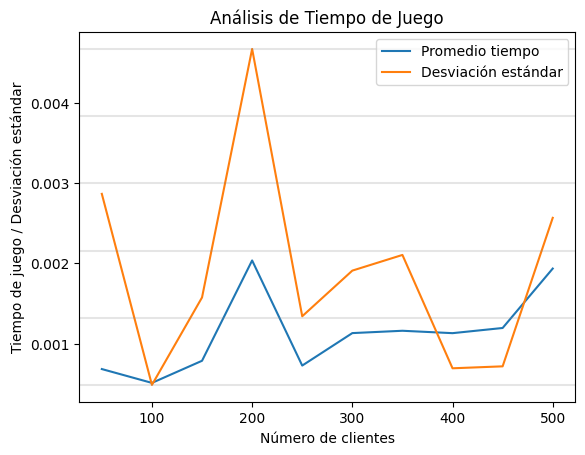

In [141]:
# Seleccionar la columna "Número de clientes" y "Desviación estándar" del DataFrame
numero_clientes = resultados_desviacion_juego["Número de clientes"]
desviacion_juego = resultados_desviacion_juego["Desviación estándar"]

# Calcular las posiciones de las líneas equidistantes
posiciones_lineas = calcular_posiciones_lineas(min(desviacion_juego), max(desviacion_juego), 5)


# Graficar el promedio y la desviación estándar
plt.plot(numero_clientes, resultados_promedio_juego["Promedio tiempo"], label="Promedio tiempo")
plt.plot(numero_clientes, resultados_desviacion_juego["Desviación estándar"], label="Desviación estándar")
plt.xlabel("Número de clientes")
plt.ylabel("Tiempo de juego / Desviación estándar")
plt.title("Análisis de Tiempo de Juego")

# Agregar líneas horizontales equidistantes
for posicion in posiciones_lineas:
    plt.axhline(posicion, color="gray", alpha=0.2)

plt.legend()
plt.show()


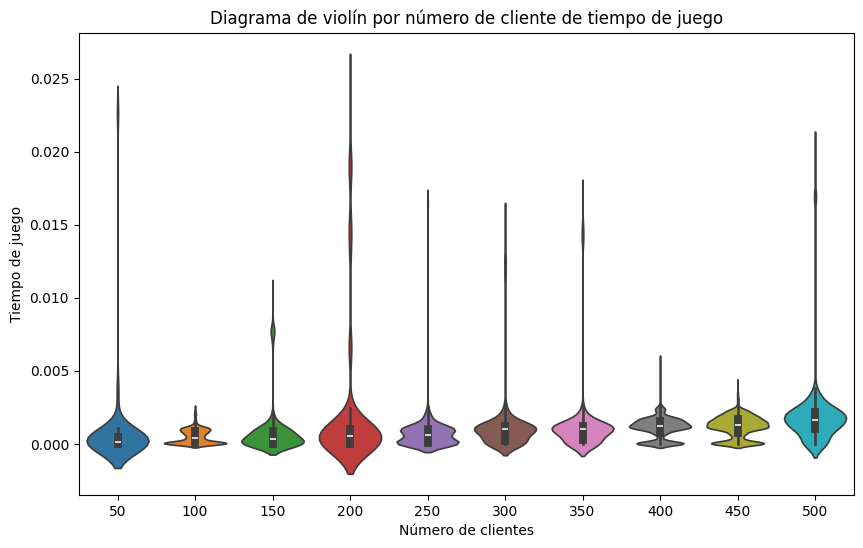

In [185]:
# Crear una figura
fig, ax = plt.subplots(figsize=(10, 6))

# Agregar los datos al diagrama
sns.violinplot(data=values_juego, ax=ax)

# Agregar título y etiquetas
plt.title("Diagrama de violín por número de cliente de tiempo de juego")
plt.xlabel("Número de clientes")
plt.ylabel("Tiempo de juego")

# Mostrar la gráfica
plt.show()


## Analisis de respuesta de registro

In [119]:
values_registro  = {}

for numero_clientes in range(50, 501, 50):
  values_registro[numero_clientes] = [] # List to store averages

for number_clients in range(initial_clients, final_clients + 1, 50):
  for current_iter in range(10):
    fileName = str(number_clients) + "_clientes_" + str(current_iter) + ".csv"
    try:
      with open(fileRegistroPath + fileName, 'r') as file:
        reader = csv.reader(file)
        # Assuming the first column contains the data for calculating the average
        for row in reader:
          values_registro[number_clients].append(float(row[0]))  # Append values from the first column
    except FileNotFoundError:
      print(f"File not found: {fileName}")
      pass

# Calculate the average of values
for numero_clientes in values_registro:
   print(values_registro[numero_clientes])


[5.935e-05, 0.003599806, 3.2997e-05, 0.000891835, 0.003857895, 0.000116735, 0.000346667, 0.000236596, 0.000542342, 3.6784e-05, 0.000177848, 0.000980023, 0.000852406, 0.003914398, 0.000254362, 0.003907735, 0.000792856, 0.000852265, 0.00019915, 0.000247318, 0.000967918, 0.000236957, 0.000937366, 4.8207e-05, 0.000892577, 0.000810462, 0.000219051, 0.000174712, 0.000866624, 0.003918366, 0.000978941, 0.003925872, 0.000914551, 3.6724e-05, 0.003917114, 0.000902737, 1.5872e-05, 6.3367e-05, 0.000959751, 0.000557632, 0.000207528, 0.000161125, 0.000870071, 0.000488644, 0.000983119, 0.000874039, 0.000498784, 0.004093348, 0.000843207, 0.000120022, 0.000427736, 0.000397787, 0.00036848, 0.000181875, 0.000366917, 0.00039937, 0.000123331, 0.000359863, 0.000343782, 0.000240319, 0.000357899, 0.000337058, 0.000255308, 0.000474597, 3.7232e-05, 0.000174009, 0.000344693, 6.3063e-05, 0.000160233, 0.000347389, 0.000165754, 5.3154e-05, 5.2242e-05, 8.1379e-05, 0.000297601, 0.000252212, 0.000205372, 0.00037321, 0.

## Promedio

In [162]:
# Lista para almacenar los resultados
resultados_promedio_registro = []

# Recorrer el diccionario values_juego
for numero_clientes, tiempos in values_registro.items():
    # Calcular el máximo y el mínimo del tiempo de juego
    maximo_tiempo = max(tiempos)
    minimo_tiempo = min(tiempos)
    
    # Calcular el promedio del tiempo de juego
    promedio_tiempo = sum(tiempos) / len(tiempos)
    
    # Agregar el resultado a la lista
    resultados_promedio_registro.append((numero_clientes, maximo_tiempo, minimo_tiempo, promedio_tiempo))

# Crear un DataFrame a partir de la lista
resultados_promedio_registro = pd.DataFrame(resultados_promedio_registro, columns=["Número de clientes", "Máximo tiempo", "Mínimo tiempo", "Promedio tiempo"])

# Mostrar el DataFrame
print(resultados_promedio_registro.to_string())


   Número de clientes  Máximo tiempo  Mínimo tiempo  Promedio tiempo
0                  50       0.022952       0.000016         0.000827
1                 100       0.004244       0.000018         0.001377
2                 150       0.010268       0.000008         0.001825
3                 200       0.038490       0.000002         0.004401
4                 250       0.020535       0.000009         0.002607
5                 300       0.028408       0.000010         0.003181
6                 350       0.018681       0.000001         0.002290
7                 400       0.008993       0.000008         0.003012
8                 450       0.007175       0.000009         0.003011
9                 500       0.034302       0.000007         0.006048


In [164]:
# Calcular el promedio por columna
promedios_por_columna = resultados_promedio_registro.mean(axis=0)

# Mostrar los promedios por columna
print(promedios_por_columna)

Número de clientes    275.000000
Máximo tiempo           0.019405
Mínimo tiempo           0.000009
Promedio tiempo         0.002858
dtype: float64


### DE

In [165]:
# Lista para almacenar los resultados
resultados_desviacion_registro = []

# Recorrer el diccionario
for numero_clientes, tiempos in values_registro.items():
    # Calcular la desviación estándar del tiempo de juego
    desviacion_estandar = np.std(tiempos)
    
    # Agregar el resultado a la lista
    resultados_desviacion_registro.append((numero_clientes, desviacion_estandar))

# Crear un DataFrame a partir de la lista
resultados_desviacion_registro = pd.DataFrame(resultados_desviacion_registro, columns=["Número de clientes", "Desviación estándar"])

# Mostrar el DataFrame
print(resultados_desviacion_registro.to_string())

   Número de clientes  Desviación estándar
0                  50             0.001788
1                 100             0.000976
2                 150             0.002131
3                 200             0.006524
4                 250             0.003532
5                 300             0.003848
6                 350             0.001863
7                 400             0.001840
8                 450             0.001768
9                 500             0.006399


### Graf prom

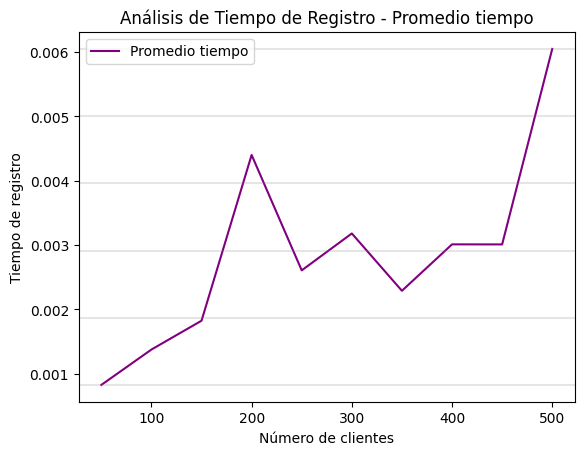

In [166]:
# Seleccionar la columna "Número de clientes" y "Promedio tiempo" del DataFrame
numero_clientes = resultados_promedio_registro["Número de clientes"]
promedio_registro = resultados_promedio_registro["Promedio tiempo"]

# Calcular las posiciones de las líneas equidistantes
posiciones_lineas = calcular_posiciones_lineas(min(promedio_registro), max(promedio_registro), 5)

# Graficar el promedio
plt.plot(numero_clientes, promedio_registro, color="purple", label="Promedio tiempo")
plt.xlabel("Número de clientes")
plt.ylabel("Tiempo de registro")
plt.title("Análisis de Tiempo de Registro - Promedio tiempo")

# Agregar líneas horizontales equidistantes
for posicion in posiciones_lineas:
    plt.axhline(posicion, color="gray", alpha=0.2)

plt.legend()
plt.show()


Graficar desviación estándar:

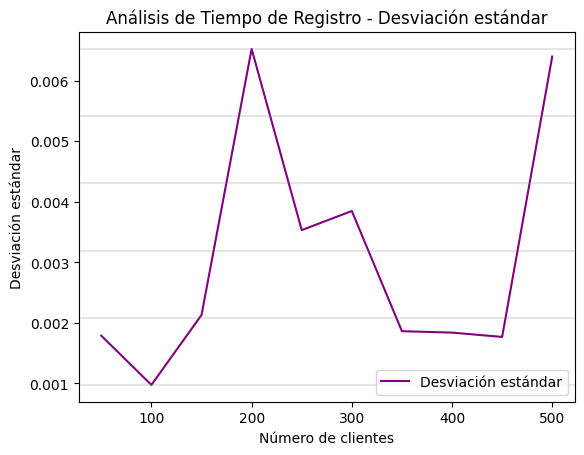

In [167]:
# Seleccionar la columna "Número de clientes" y "Desviación estándar" del DataFrame
numero_clientes = resultados_desviacion_registro["Número de clientes"]
desviacion_registro = resultados_desviacion_registro["Desviación estándar"]

# Calcular las posiciones de las líneas equidistantes
posiciones_lineas = calcular_posiciones_lineas(min(desviacion_registro), max(desviacion_registro), 5)

# Graficar la desviación estándar
plt.plot(numero_clientes, desviacion_registro, color="purple", label="Desviación estándar")
plt.xlabel("Número de clientes")
plt.ylabel("Desviación estándar")
plt.title("Análisis de Tiempo de Registro - Desviación estándar")

# Agregar líneas horizontales equidistantes
for posicion in posiciones_lineas:
    plt.axhline(posicion, color="gray", alpha=0.2)

plt.legend()
plt.show()

Graficar juntas:

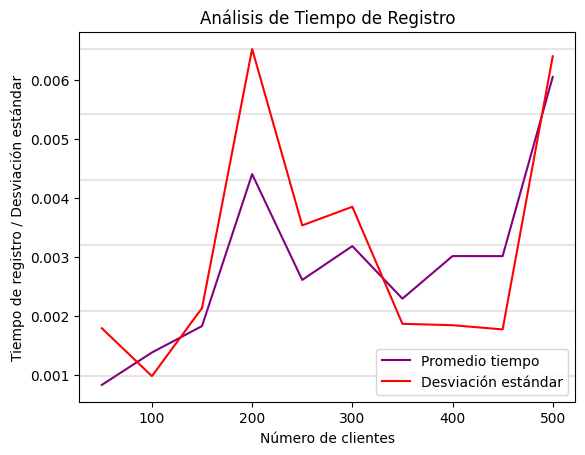

In [168]:
# Seleccionar la columna "Número de clientes" y "Desviación estándar" del DataFrame
numero_clientes = resultados_desviacion_registro["Número de clientes"]
desviacion_registro = resultados_desviacion_registro["Desviación estándar"]

# Calcular las posiciones de las líneas equidistantes
posiciones_lineas = calcular_posiciones_lineas(min(desviacion_registro), max(desviacion_registro), 5)

# Graficar el promedio y la desviación estándar
plt.plot(numero_clientes, resultados_promedio_registro["Promedio tiempo"], color="purple", label="Promedio tiempo")
plt.plot(numero_clientes, resultados_desviacion_registro["Desviación estándar"], color="red", label="Desviación estándar")
plt.xlabel("Número de clientes")
plt.ylabel("Tiempo de registro / Desviación estándar")
plt.title("Análisis de Tiempo de Registro")

# Agregar líneas horizontales equidistantes
for posicion in posiciones_lineas:
    plt.axhline(posicion, color="gray", alpha=0.2)

plt.legend()
plt.show()


### Numero de registros

In [169]:
# Lista para almacenar los datos
datos_porcentaje = []

# Recorrer el diccionario values_registro
for numero_clientes, tiempos in values_registro.items():
    # Contar el número de registros
    numero_registros = len(tiempos)
    
    # Calcular el porcentaje de registros
    porcentaje_registros = numero_registros / (10 * numero_clientes)
    
    # Agregar los datos a la lista
    datos_porcentaje.append((numero_clientes, numero_registros, porcentaje_registros))


In [152]:
# Crear un DataFrame a partir de la lista
df_porcentaje = pd.DataFrame(datos_porcentaje, columns=["Número de clientes", "Número de registros", "Porcentaje de registros"])

# Mostrar el DataFrame
print(df_porcentaje.to_string())

   Número de clientes  Número de registros  Porcentaje de registros
0                  50                  500                      1.0
1                 100                 1000                      1.0
2                 150                 1500                      1.0
3                 200                 2000                      1.0
4                 250                 2500                      1.0
5                 300                 3000                      1.0
6                 350                 3500                      1.0
7                 400                 4000                      1.0
8                 450                 4500                      1.0
9                 500                 5000                      1.0


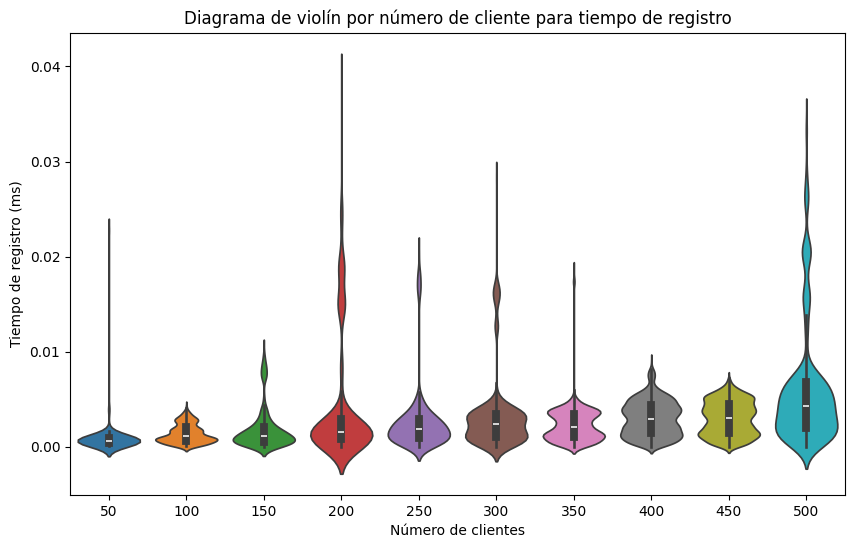

In [184]:
# Crear una figura
fig, ax = plt.subplots(figsize=(10, 6))

# Agregar los datos al diagrama
sns.violinplot(data=values_registro, ax=ax)

# Agregar título y etiquetas
plt.title("Diagrama de violín por número de cliente para tiempo de registro")
plt.xlabel("Número de clientes")
plt.ylabel("Tiempo de registro (ms)")

# Mostrar la gráfica
plt.show()
